# TSIA202a - Second Practice Session : Spectral density estimation and periodogram
The goal of this second session is to provide a power spectral density estimator of a real, zero-mean, weakly stationary process $X_t$. We suppose that we have access to $n$ observations and we will use the FFT algorithm (that implements the DFT) using `numpy.fft.module`.
Recall (from the course) that the periodogram of the observations $X_0, \dots, X_{n-1}$ can be given as:
$$
I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2
$$

Moreover, the Hertglotz theorem provides a relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$:
$$
\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda
$$

1. For a given $m \geq n$  we denote also the DFT as:
$$
DFT(X,m)(k) = \sum_{h=0}^{n-1}X_he^{-2i\pi\frac{kh}{m}}
$$
Show the following relation: 
$$I_n(\frac{2\pi k}{m}) = \frac{1}{2\pi n} |DFT(X,m)(k)|^2$$
2. provide a script that compute those $I_n(\frac{2\pi k}{m})$ for the time series mentioned in the first practice session
3. Show that $I_n(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$
4. How to choose $m$ in order to get a simple relation between $\hat{\gamma}_n(k)$ and $I_n(\frac{2\pi k}{m})$ ? At the end, given a specific $\tilde{m}$ show that:
$$
\hat{\gamma}_n(k) = \frac{1}{n} IDFT\left(\left|DFT(X, \tilde{m})\right|^2, \tilde{m}\right)(k)
$$ Try this estimator on the autocovariance of previous time series of the first session.

5. In the case of white noise, estimate the variance of the periodogram for several values of $n$ and discuss about it.

___
Question 1 answered on paper.
___
Question 2 :

In [ ]:
import numpy as np

def periodogram(X,k,m):
    n = len(X)
    S = 0
    for i in range(n):
        S+=X[i]*np.exp(1j*i*2*np.pi*k/m)
    return((abs(S)**2)/(2*np.pi*n))

n = 1000
sigma = 1.5
a = 3
b = -2
K = 500
A0 = 4
lambda0 = 0.3
phi0 = np.random.uniform(0,2*np.pi)

def generate_random(n):
    Z = np.random.normal(0,sigma,n+1+K)
    X1 = Z[0:n]  # Random process n°1
    X2 = []
    for i in range(n):
        X2.append(a + b*Z[i+1] + Z[i])
    X3 = []
    for i in range(n):
        s = a
        for k in range (K+1): # 0 <= k <= K
            s += 2**(-k)*Z[K + i - k] # We use this so that every Z[K+i-k] exists, by generating n+1+K random gaussian
        X3.append(s)
    X4 = []
    for i in range(n):
        X4.append(A0*np.cos(lambda0*i+phi0)+Z[i])
    return(X1,X2,X3,X4)

X1,X2,X3,X4 = generate_random(n)

periodogram_X1 = periodogram(X1,7,n) # With m = n

___
# Question 3 : #

By definition of periodogram : $I_n(\lambda) = \frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2$

We also have this relation between the empirical autocovariance $\hat{\gamma}_n$ and the periodogram $I_n$ : $\hat{\gamma}_n(k) = \int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda$

We define $D(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k}$

We want to show that $D(\lambda) = I_n(\lambda)$


$D(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1} \hat{\gamma}_n(k)e^{-i\lambda k} = \frac{1}{2\pi} \sum_{k=0}^{n-1}\int_{0}^{2\pi}e^{i\lambda k}I_n({\lambda})d\lambda e^{-i\lambda k}$

We then replace  $I_n(\lambda)$ by its expression :

$D(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1}\int_{0}^{2\pi}e^{i\lambda k}\frac{1}{2\pi n}|\sum_{k=0}^{n-1} X_k e^{i\lambda k}|^2d\lambda e^{-i\lambda k}$

We know that for $\forall \mathbb{z} \in \mathbb{C}, |\mathbb{z}|² = \mathbb{z}\overline{\mathbb{z}}$

$D(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1}\int_{0}^{2\pi}e^{i\lambda k}\frac{1}{2\pi n}(\sum_{j=0}^{n-1} X_p e^{i\lambda p})(\sum_{l=0}^{n-1} X_l e^{-i\lambda l})d\lambda e^{-i\lambda k}$

We also know that :
$\forall k \in \mathbb{Z}, \int_{0}^{2\pi}e^{i\lambda k}d\lambda = 
\begin{cases}
2\pi & \text{if } k = 0 \\
0 & \text{otherwise}
\end{cases}$

So :

$D(\lambda) = \frac{1}{2\pi} \sum_{k=0}^{n-1}\sum_{p=0}^{n-1}\sum_{l=0}^{n-1}X_pX_l\int_{0}^{2\pi}\frac{1}{2\pi n}e^{i\lambda (k+p-l)}d\lambda e^{-i\lambda k}$

We take $k  = l  -p$ to have $\int_{0}^{2\pi}\frac{1}{2\pi n}e^{i\lambda (k+p-l)}d\lambda = \frac{1}{n}$

$D(\lambda) = \frac{1}{2\pi n} \sum_{p=0}^{n-1}\sum_{l=0}^{n-1}X_pX_l e^{-i\lambda (l-p)}$

$D(\lambda) = \frac{1}{2\pi n} \sum_{p=0}^{n-1}X_p e^{i\lambda p}\sum_{l=0}^{n-1}X_l e^{-i\lambda l} = \frac{1}{2\pi n} |\sum_{p=0}^{n-1}X_p e^{i\lambda p}|² = I_n(\lambda)$

___
Question 4 answered on paper.
___
Question 5 :

For white noise, we can use the random process 1 as defined in the first practice session, with $\sigma² = 1$.

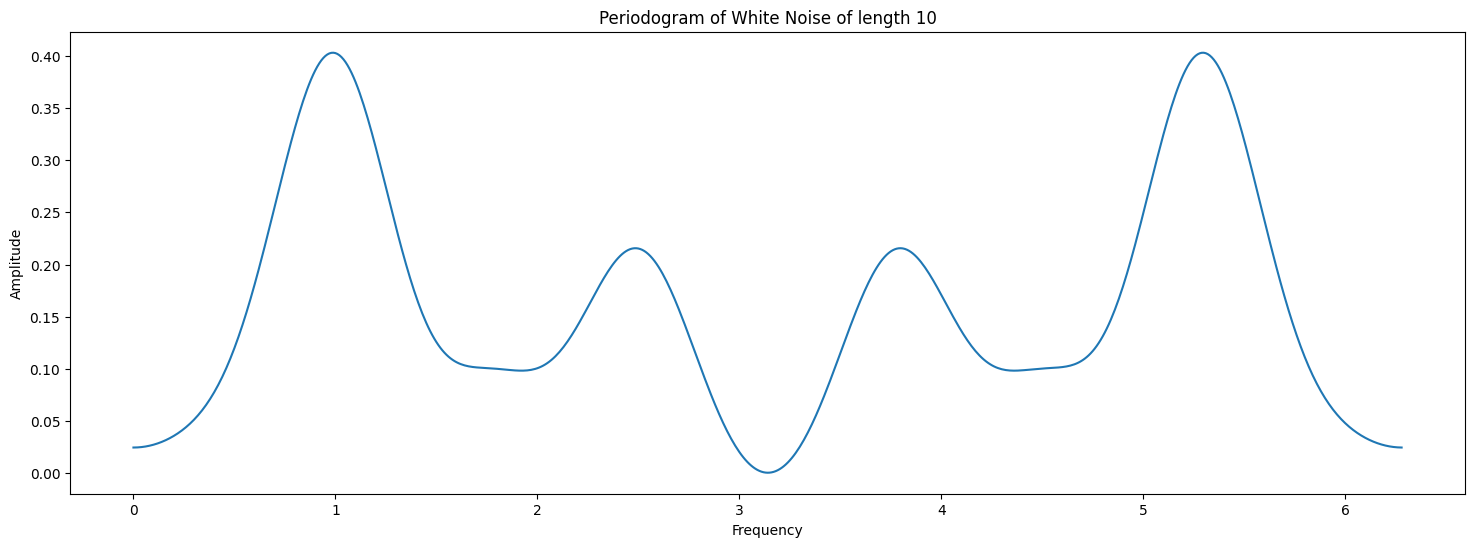

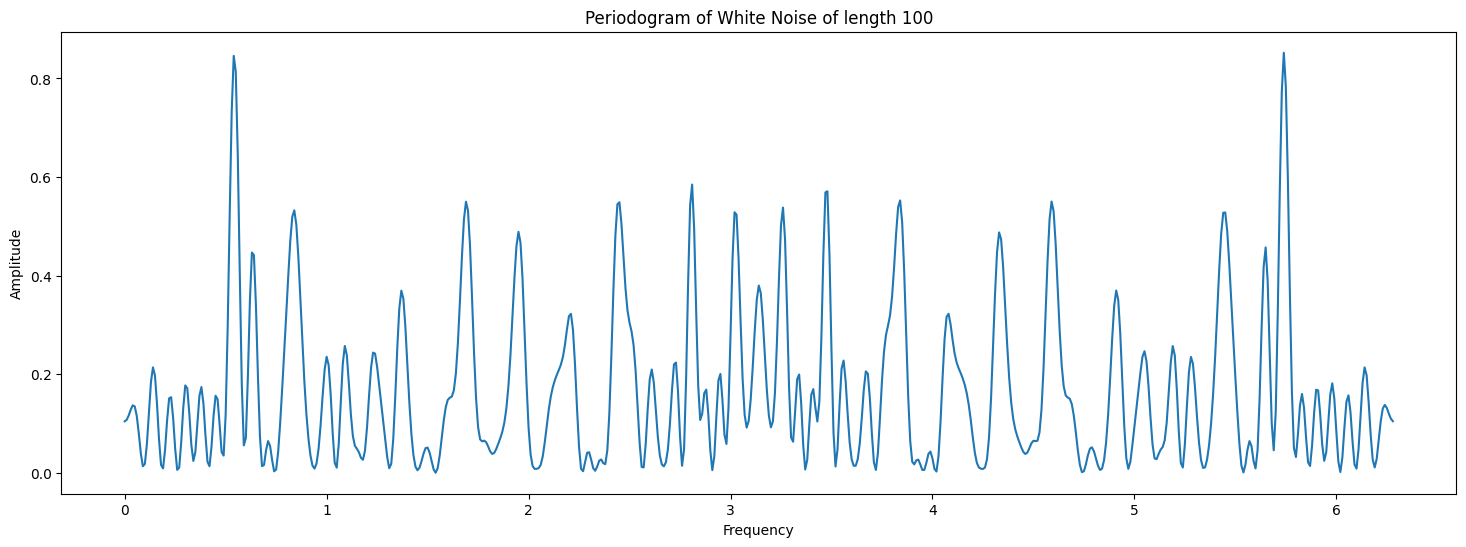

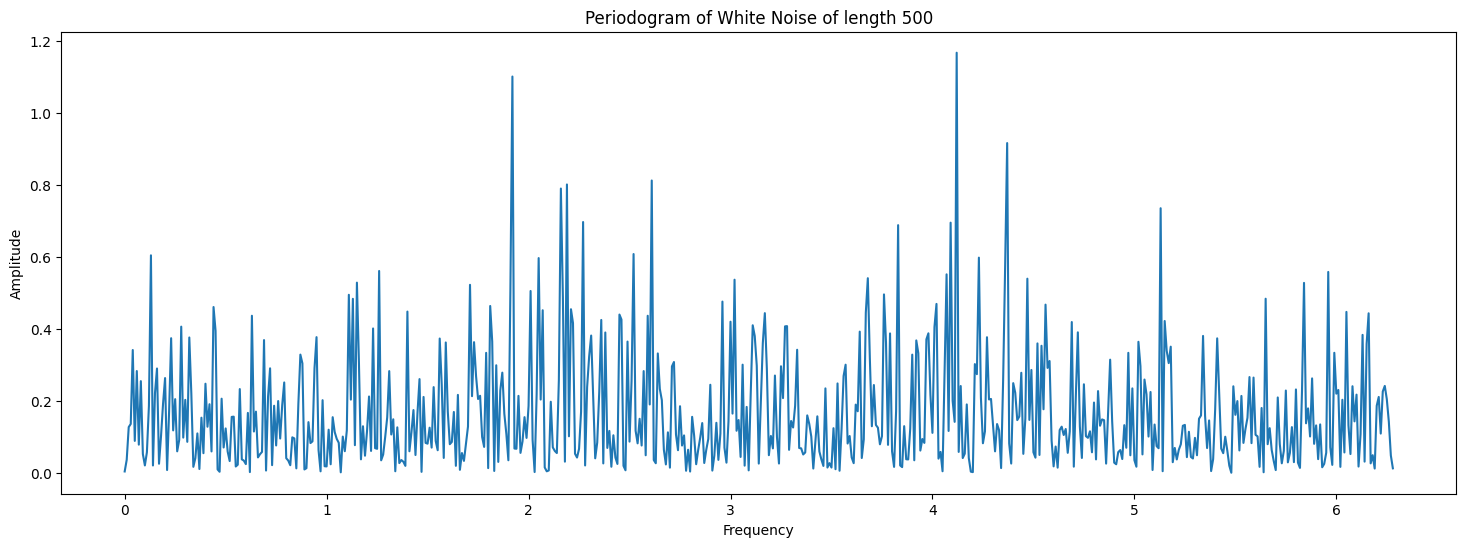

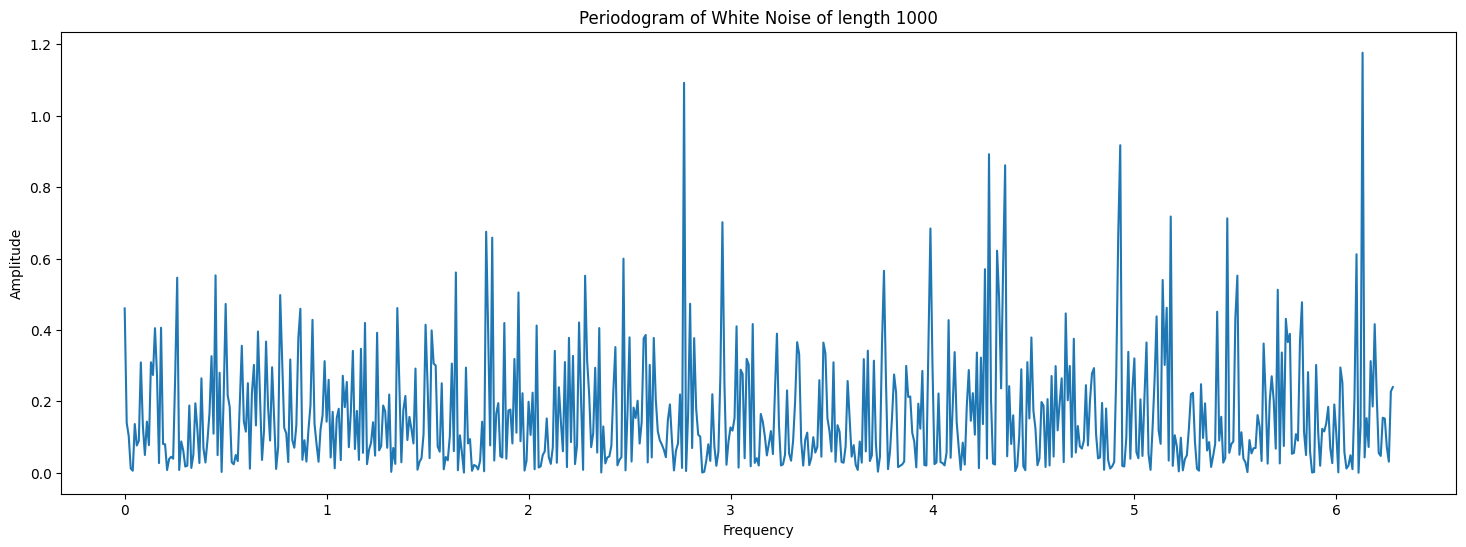

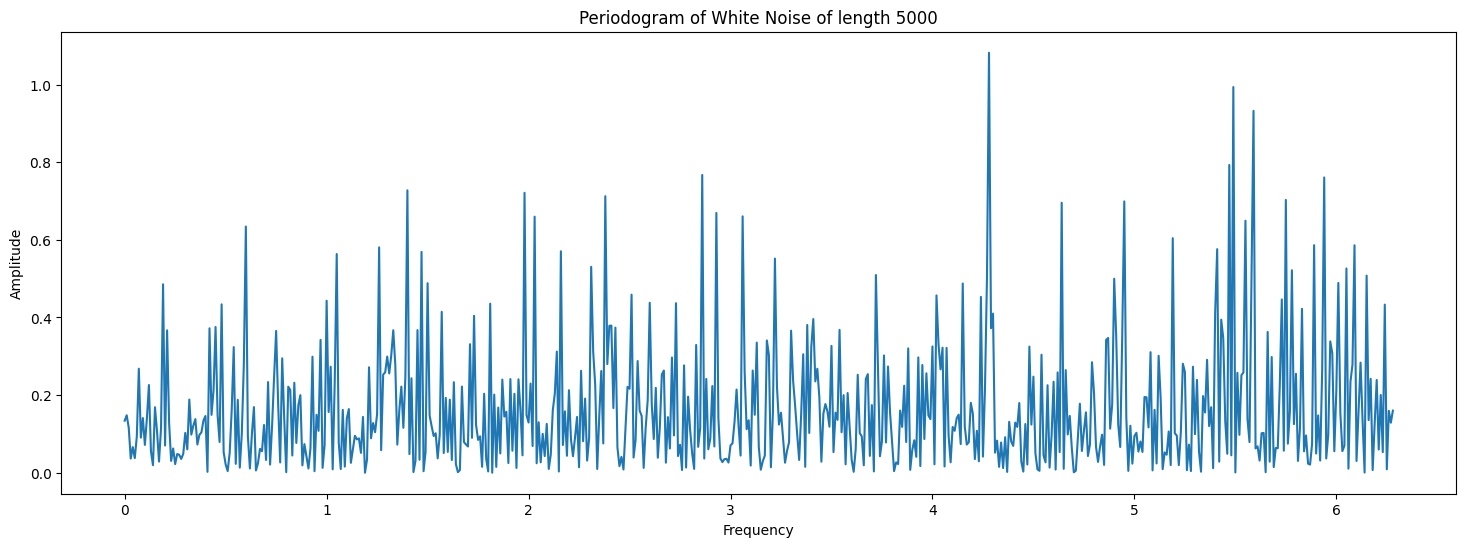

In [13]:
import matplotlib.pyplot as plt

def periodogram_lambda(X,lamb):
    n = len(X)
    S = 0
    for i in range(n):
        S+=X[i]*np.exp(1j*i*lamb)
    return((abs(S)**2)/(2*np.pi*n))

N = [10,100,500,1000,5000]

for n in N:
    X = np.random.normal(0,1,n)
    lamb = np.arange(0,2*np.pi,0.01)
    periodogram_X = periodogram_lambda(X,lamb)
    plt.figure(figsize=(18,6))
    plt.plot(lamb,periodogram_X)
    plt.title(f'Periodogram of White Noise of length {n}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')


We notice that the periodogram seems to be uniformly spreading along all frequencies as n is increasing. Since the samples of $\mathcal{N}(0,1)$ are independent, its spectral distribution is uniformly distributed over all frequency components.